# Ejercicio 4

Se desea obtener el valor de la resistencia de canal de un transistor LDMOS RD15VHF1, para ello se intercala entre el terminal positivo de la fuente y DRAIN un amperímetro. El terminal de SOURCE se conecta al negativo de la fuente y en paralelo con la fuente, un voltímetro para medir la tensión de salida. Se hicieron mediciones simultaneas de tensión y corriente, obteniéndose para VGS=4V la siguiente tabla de resultados

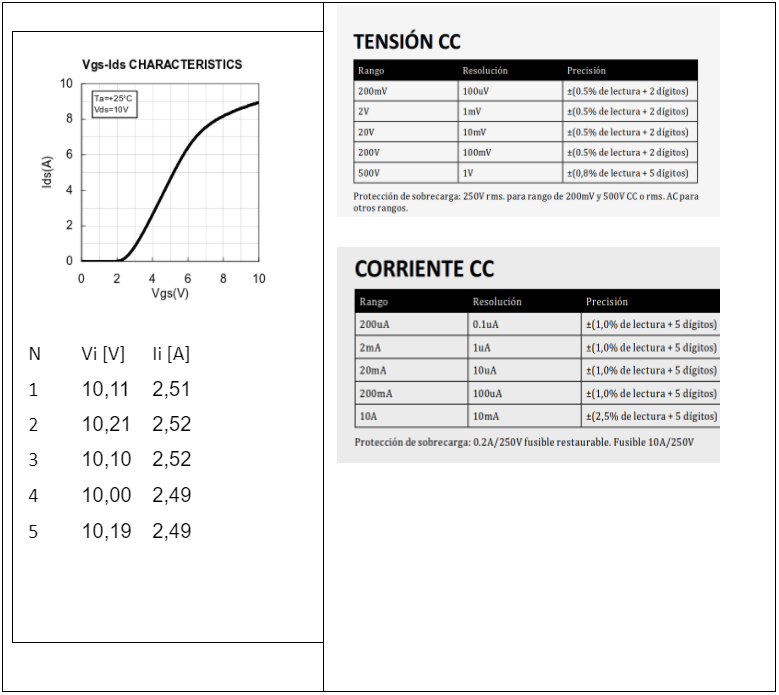

Siendo la media aritmetica y la desviacion estandar:

$$
\bar{X} = \frac{1}{N}\sum_{k=1}^{N} X_k~~~~~~~~s(X) = \sqrt{\frac{1}{N-1}\sum_{k=1}^{N} (X_k - \bar{X})^2}
$$

In [1]:
from numpy import sqrt, std

VI = [10.11, 10.21, 10.10, 10.00, 10.19]
II = [2.51, 2.52, 2.52, 2.49, 2.49]

V = sum(VI) / len(VI)
I = sum(II) / len(II)

ui_v = std(VI, ddof=1)
ui_i = std(II, ddof=1)

print("Valor medio de la tension indicada: {} V".format(V))
print("Valor medio de la corriente indicada: {} A".format(I))
print("\nError tipo A de la tension indicada: {} V".format(ui_v))
print("Error tipo A de la corriente indicada: {} A".format(ui_i))

Valor medio de la tension indicada: 10.122 V
Valor medio de la corriente indicada: 2.506 A

Error tipo A de la tension indicada: 0.08348652585896738 V
Error tipo A de la corriente indicada: 0.015165750888102984 A


Siendo el error tipo B:

$$
u_j = \frac{a}{\sqrt{3}}~~~~~~a = \Delta V .err\%~~~~~~err\% = err_{med}\% + err_{cont}\%
$$

$$
err_{cont}\% = \frac{total~de~conteos}{valor~de~cuentas~del~instrumento}~.~100\%
$$

In [2]:
CONTEOS = [2 * 100, 5 * 100]
CUENTAS = [1012, 2506]
ERRM    = [0.5, 2.5]      # [%]

errc_v = CONTEOS[0] / CUENTAS[0]
err_v = errc_v + ERRM[0]
a_v = V * err_v / 100
uj_v = a_v / sqrt(3)

errc_i = CONTEOS[1] / CUENTAS[1]
err_i = errc_i + ERRM[1]
a_i = I * err_i / 100
uj_i = a_i / sqrt(3)

print("Valor del error tipo B del voltimetro: {} V".format(uj_v))
print("Valor del error tipo B del amperimetro: {} A".format(uj_i))

Valor del error tipo B del voltimetro: 0.04076898452435374 V
Valor del error tipo B del amperimetro: 0.03905774571067819 A


Siendo la incertidumbre combinada del instrumento:

$$
u_c = \sqrt{u^2_i + u^2_j}
$$

In [3]:
uc_v = sqrt(ui_v ** 2 + uj_v ** 2)
uc_i = sqrt(ui_i ** 2 + uj_i ** 2)

print("Valor de la incertidumbre combinada del voltimetro: {} V".format(uc_v))
print("Valor de la incertidumbre combinada del amperimetro: {} A".format(uc_i))

Valor de la incertidumbre combinada del voltimetro: 0.09290914970629655 V
Valor de la incertidumbre combinada del amperimetro: 0.04189877683178826 A


Siendo el circuito:

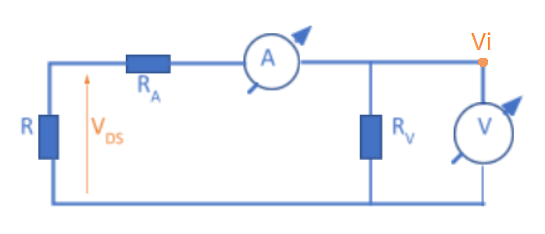

Asumiendo la resistencia del voltimetro:

$$
R_v = 1~M\Omega
$$

Del circuito obtenemos las siguientes ecuaciones:


$$
\left\{
    \begin{array}\\
        I_i = I_{ds} \\
        V_i = V_a + V_{ds}
    \end{array}
\right.
$$

Siendo la resistencia del canal:

$$
R_i = \frac{V_i}{I_i} = \frac{V_a + V_{ds}}{I_i} = \frac{V_a}{I_i} + \frac{V_{ds}}{I_i}~~\to~~R_i = R_a + R
$$

Como $V_{ds}~>>~V_a$ y $R~>>~R_a$:

$$
R_i = \frac{V_i}{I_i}
$$

In [4]:
ri = V / I

print("El valor de la resistencia del canal es: {} ohms".format(ri))

El valor de la resistencia del canal es: 4.039106145251397 ohms


Siendo la incertidumbre combinada de la resistencia:

$$
u^2_c(R_i) = (\frac{1}{I})^2~.~u^2_c(v) + (- \frac{V}{I^2})^2~.~u^2_c(i)
$$

In [5]:
d1 = ( (1 / I) ** 2 ) * ( uc_v ** 2 )
d2 = ( ( - V / I ** 2 ) ** 2 ) * ( uc_i ** 2 )
uc_ri = sqrt( d1 + d2 )

print("El valor de la incertidumbre combinada de la resistencia de canal es: {} ohm".format(uc_ri))

El valor de la incertidumbre combinada de la resistencia de canal es: 0.07703906504481176 ohm


Siendo $R$:

$$
R = \frac{R_i}{1 + e_m}~~\to~~e_m = \frac{R_i - R}{R}~~~~~~~donde~~R = R_i - R_a
$$

$$
e_m = \frac{R_i - R_i + R_a}{R_i - R_a}~~\to~~e_m = \frac{R_a}{R_i - R_a}
$$

Siendo $R_a$:

$$
R_a = \frac{V_{min~escala}}{I_{max~escala}}
$$

In [6]:
VMIN = 200e-3
IMAX = 10
RV = 1e6

ra = VMIN / IMAX


print("El valor de Ra es: {} ohms".format(ra))

El valor de Ra es: 0.02 ohms


Siendo el cuadrado de la incertidumbre combinada de $R_a$:

$$
u^2_c(R_a) = (\frac{1}{I_{max~escala}})^2~.~u^2_c(V_{min~escala}) + (- \frac{V_{min~escala}}{I^2_{max~escala}})^2~.~u^2_c(I_{max~escala})
$$

In [7]:
d1 = ( (1 / IMAX) ** 2 ) * ( uj_v ** 2 )
d2 = ( ( - VMIN / IMAX ** 2 ) ** 2 ) * ( uj_i ** 2 )
uc_ra = sqrt( d1 + d2 )

print("El valor de la incertidumbre combinada de la resistencia del amperimetro es: {} ohms".format(uc_ra))

El valor de la incertidumbre combinada de la resistencia del amperimetro es: 0.00407764675045178 ohms


Siendo el error de lectura:

$$
err_l = 0,1~.~\frac{U_c(R_i)}{R}~~~~~~~~~~con~~k = 2
$$

$La~incertidumbre~debe~ser~expandida!!!$

In [8]:
K = 2
em = ra / (ri - ra)
r = ri / (1 + em)
ERR_L = 0.1 * uc_ri * 2 / r

print("El valor verdadero de la resistencia de canal es: {} ohms".format(r))
print("El valor del error de metodo es: {}".format(em))
print("El valor del error de lectura es: {}".format(ERR_L))

El valor verdadero de la resistencia de canal es: 4.0191061452513965 ohms
El valor del error de metodo es: 0.004976230852631286
El valor del error de lectura es: 0.0038336417233386074


Debido a que el error de metodo multiplicado por 10 es mayor que el error de lectura, es necesario corregir el valor de lectura.

$$
R_i = (4,039~;\pm~0,077)~\Omega
$$

Siendo el valor verdadero de la resistencia de canal:

$$
R = \frac{R_i}{1 + e_m} = 4,019~\Omega
$$

Siendo el cuadrado de la incertidumbre combinada del error de metodo:

$$
u^2_c(e_m) = (\frac{R_i}{(R_i - R_a)^2})^2~.~u^2_c(R_a) + (\frac{- R_a}{(R_i - R_a)^2})^2~.~u^2_c(R_i)
$$

Siendo el cuadrado de la incertidumbre combinada relativa del error de metodo:

$$
u^2_{cR}(e_m) = (\frac{R_i}{(R_i - R_a)^2}\frac{R_a}{e_m})^2~.~u^2_{cR}(R_a) + (\frac{- R_a}{(R_i - R_a)^2}\frac{R_i}{e_m})^2~.~u^2_{cR}(R_i)
$$

Remplazando $e_m$:

$$
u^2_{cR}(e_m) = (\frac{R_i}{(R_i - R_a)^2}\frac{R_a}{\frac{R_a}{R_i - R_a}})^2~.~u^2_{cR}(R_a) + (\frac{- R_a}{(R_i - R_a)^2}\frac{R_i}{\frac{R_a}{R_i - R_a}})^2~.~u^2_{cR}(R_i)
$$

$$
u^2_{cR}(e_m) = (\frac{R_i}{R_i - R_a})^2~.~u^2_{cR}(R_a) + (\frac{- R_i}{R_i - R_a})^2~.~u^2_{cR}(R_i)
$$

$$
u^2_{cR}(e_m) = (\frac{R_i}{R_i - R_a})^2~.~( u^2_{cR}(R_a) + u^2_{cR}(R_i) )
$$

In [28]:
d = ri / (ri - ra)
ucr_ri = uc_ri / ri
ucr_ra = uc_ra / ra
ucr_em = sqrt( d ** 2 * ( ucr_ra ** 2 + ucr_ri **2 ) )

print("El valor de la incertdiumbre combinada relativa del error de metodo es: {}".format(ucr_em))

El valor de la incertdiumbre combinada relativa del error de metodo es: 0.20579154774164704


Siendo el cuadrado de la incertidumbre combinada del valor verdadero de la resistencia del canal:

$$
u^2_c(R) = (\frac{1}{1 + e_m})^2~.~u^2_c(R_i) + (\frac{- R_i}{(1 + e_m)^2})^2~.~u^2_c(e_m)
$$

Calculando el cuadrado de la incertidumbre combinada relativa del valor verdadero de la resistencia del canal:

$$
u^2_{cR}(R) = (\frac{1}{(1 + e_m)}\frac{R_i}{R})^2~.~u^2_{cR}(R_i) + (\frac{- R_i}{(1 + e_m)^2}\frac{e_m}{R})^2~.~u^2_{cR}(e_m)
$$

Remplazando $R_i = R~.~(1 + e_m)$

$$
u^2_{cR}(R) = (\frac{(1 + e_m)}{(1 + e_m)}\frac{R}{R})^2~.~u^2_{cR}(R_i) + (\frac{- R~.~(1 + e_m)}{(1 + e_m)^2}\frac{e_m}{R})^2~.~u^2_{cR}(e_m)
$$

$$
u^2_{cR}(R) = u^2_{cR}(R_i) + (- \frac{e_m}{1 + e_m})^2~.~u^2_{cR}(e_m)
$$

In [19]:
d2 = - em / (1 + em)
ucr_r = sqrt( ucr_ri ** 2 + ( d2 ** 2 * ucr_em ** 2 ) )

print("El valor de la incertdiumbre combinada relativa dela resistencia verdadera es: {}".format(ucr_r))

El valor de la incertdiumbre combinada relativa dela resistencia verdadera es: 0.019100496141725123


Siendo el valor de la incertidumbre combinada de $R$:

$$
u_c(R) = u_{cR}(R)~.~R
$$

In [20]:
uc_r = ucr_r * r

print("El valor de la incertidumbre combinada de la resistencia verdadera es: {} ohms".format(uc_r))

El valor de la incertidumbre combinada de la resistencia verdadera es: 0.07676692142055803 ohms


Expandiendo con un factor de cobertura del 95,45%:

$$
U(R) = k~.~u_c(R)~~~~~~~~~k_{expansion} = 2
$$

In [21]:
k = 2
u_r = uc_r * k

print("El valor de la incertidumbre expandida de la resistencia verdadera es: {} ohms".format(u_r))

El valor de la incertidumbre expandida de la resistencia verdadera es: 0.15353384284111607 ohms


Por lo tanto el valor verdadero de la resistencia de canal es:

$$
R = (4,02~;\pm~0,15)~\Omega
$$